This motor was selected due to it's flight heritage as it has the MG9xx series motors have been used by many teams. Furthermore the MG996R in particular has documented use (ThrustMIT) and has a stall torque rated well above the maximum calculated torque in the load analysis.

based on https://components101.com/sites/default/files/component_datasheet/MG996R-Datasheet.pdf

In [5]:
import matplotlib.pyplot as plt
import numpy as np

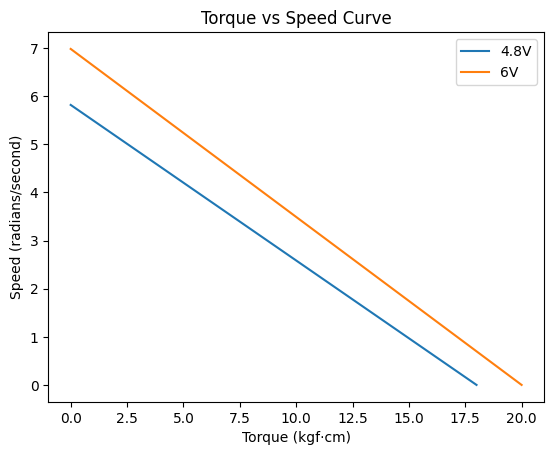

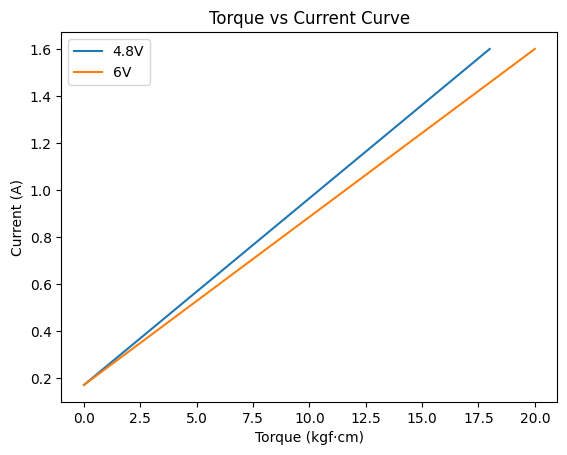

In [6]:


def torque_vs_speed():
    # Define parameters for both voltages
    stall_torque_48 = 18  # kgf·cm
    no_load_speed_48 = 60 / 0.18  # degrees per second
    stall_torque_6 = 20  # kgf·cm
    no_load_speed_6 = 60 / 0.15  # degrees per second

    # Create a range of torques
    torque_48 = np.linspace(0, stall_torque_48, 100)
    torque_6 = np.linspace(0, stall_torque_6, 100)

    # Calculate speed (convert degrees per second to radians per second)
    speed_48 = no_load_speed_48 * (1 - torque_48 / stall_torque_48) * (2 * np.pi / 360)
    speed_6 = no_load_speed_6 * (1 - torque_6 / stall_torque_6) * (2 * np.pi / 360)

    # Plotting
    plt.plot(torque_48, speed_48, label='4.8V')
    plt.plot(torque_6, speed_6, label='6V')
    plt.xlabel('Torque (kgf·cm)')
    plt.ylabel('Speed (radians/second)')
    plt.title('Torque vs Speed Curve')
    plt.legend()
    plt.show()

def current_vs_torque():
    # Define parameters
    running_current = 0.17  # A
    stall_current = 1.6  # A
    stall_torque_48 = 18  # kgf·cm
    stall_torque_6 = 20  # kgf·cm

    # Torque range
    torque_48 = np.linspace(0, stall_torque_48, 100)
    torque_6 = np.linspace(0, stall_torque_6, 100)

    # Calculate current
    current_48 = running_current + (stall_current - running_current) * (torque_48 / stall_torque_48)
    current_6 = running_current + (stall_current - running_current) * (torque_6 / stall_torque_6)

    # Plotting
    plt.plot(torque_48, current_48, label='4.8V')
    plt.plot(torque_6, current_6, label='6V')
    plt.xlabel('Torque (kgf·cm)')
    plt.ylabel('Current (A)')
    plt.title('Torque vs Current Curve')
    plt.legend()
    plt.show()


torque_vs_speed()

current_vs_torque()

In [7]:
# Based on: https://www.towerpro.com.tw/product/mg958/

def torque_vs_speed(torque_input): 
    # Parameters for both voltages
    stall_torque_48 = 18 # kgf·cm
    no_load_speed_48 = 60 / 0.18  # degrees per second
    stall_torque_6 = 20  # kgf·cm
    no_load_speed_6 = 60 / 0.15  # degrees per second

    # Calculate speed for input torque (convert degrees per second to radians per second)
    speed_48 = no_load_speed_48 * (1 - torque_input / stall_torque_48) * (2 * np.pi / 360) if torque_input <= stall_torque_48 else 0
    speed_6 = no_load_speed_6 * (1 - torque_input / stall_torque_6) * (2 * np.pi / 360) if torque_input <= stall_torque_6 else 0

    return speed_48, speed_6
def current_vs_torque(torque_input):
    # Parameters
    running_current = 0.17  # A
    stall_current = 1.6  # A
    stall_torque_48 = 18 # kgf·cm
    stall_torque_6 = 20  # kgf·cm

    # Calculate current for input torque
    current_48 = running_current + (stall_current - running_current) * (torque_input / stall_torque_48) if torque_input <= stall_torque_48 else stall_current
    current_6 = running_current + (stall_current - running_current) * (torque_input / stall_torque_6) if torque_input <= stall_torque_6 else stall_current

    return current_48, current_6


# Example usage
torque_value = 0.5546323287727919  # torque value
speed_48, speed_6 = torque_vs_speed(torque_value)

# Convert from radians/second to rotations per second
speed_48_rps = speed_48 / (2 * np.pi)
speed_6_rps = speed_6 / (2 * np.pi)

print(f"Speed at 4.8V for {torque_value} kgf·cm: {speed_48_rps} rotations/second")
print(f"Speed at 6V for {torque_value} kgf·cm: {speed_6_rps} rotations/second")

# Apply gear ratio (2:1) - doubling the speed and halving the torque
gearing_factor = 9
geared_torque_value = torque_value * gearing_factor
geared_speed_48, geared_speed_6 = torque_vs_speed(geared_torque_value)
geared_speed_48_rps = geared_speed_48 * gearing_factor / (2 * np.pi)  # Doubling the speed
geared_speed_6_rps = geared_speed_6 * gearing_factor / (2 * np.pi)    # Doubling the speed

print(f"Geared screw speed at 4.8V for {geared_torque_value} kgf·cm (with {gearing_factor}:1 ratio): {geared_speed_48_rps} rotations/second")
print(f"Geared screw speed at 6V for {geared_torque_value} kgf·cm (with {gearing_factor}:1 ratio): {geared_speed_6_rps} rotations/second")


# Example usage
current_48, current_6 = current_vs_torque(torque_value)
print(f"Current at 4.8V for {torque_value} kgf·cm: {current_48} A")
print(f"Current at 6V for {torque_value} kgf·cm: {current_6} A")

Speed at 4.8V for 0.5546323287727919 kgf·cm: 0.8973954563388482 rotations/second
Speed at 6V for 0.5546323287727919 kgf·cm: 1.0802982039570672 rotations/second
Geared screw speed at 4.8V for 4.991690958955127 kgf·cm (with 9:1 ratio): 6.022365296780034 rotations/second
Geared screw speed at 6V for 4.991690958955127 kgf·cm (with 9:1 ratio): 7.5041545205224365 rotations/second
Current at 4.8V for 0.5546323287727919 kgf·cm: 0.21406245723028294 A
Current at 6V for 0.5546323287727919 kgf·cm: 0.20965621150725464 A


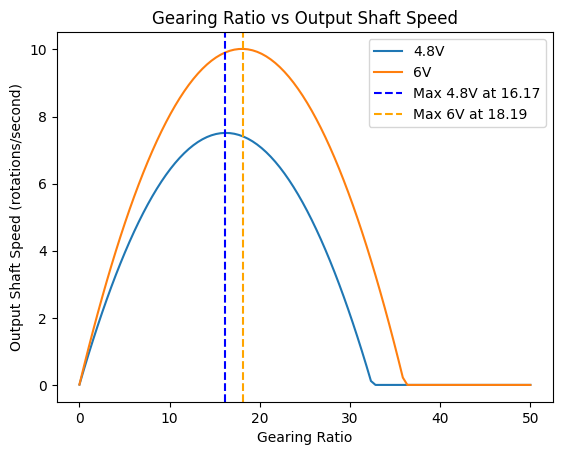

Maximum speed at 4.8V: 7.512386394887434 rotations/second, Gearing Ratio: 16.17, Effective Torque on Motor: 8.97 kgf·cm
Maximum speed at 6V: 10.015874392187454 rotations/second, Gearing Ratio: 18.19, Effective Torque on Motor: 10.09 kgf·cm


In [8]:
import matplotlib.pyplot as plt
import numpy as np


def plot_gearing_ratio_vs_speed(torque_value):
    gearing_ratios = np.linspace(0.01, 50, 100)  # Gearing ratios from near 0 to 50
    speeds_48_rps = []
    speeds_6_rps = []

    for gearing_factor in gearing_ratios:
        # Effective torque increases with gearing
        effective_servo_torque = torque_value * gearing_factor

        # Calculate speed at this gearing ratio
        speed_48, speed_6 = torque_vs_speed(effective_servo_torque)

        # Convert from radians/second to rotations per second
        speed_48_rps = (speed_48 / (2 * np.pi)) * gearing_factor  # Adjusted for output shaft speed
        speed_6_rps = (speed_6 / (2 * np.pi)) * gearing_factor    # Adjusted for output shaft speed

        speeds_48_rps.append(speed_48_rps)
        speeds_6_rps.append(speed_6_rps)
        
    # Find the maxima and their corresponding gearing ratios
    max_speed_48 = max(speeds_48_rps)
    max_ratio_48 = gearing_ratios[speeds_48_rps.index(max_speed_48)]

    max_speed_6 = max(speeds_6_rps)
    max_ratio_6 = gearing_ratios[speeds_6_rps.index(max_speed_6)]

    # Plotting
    plt.plot(gearing_ratios, speeds_48_rps, label='4.8V')
    plt.plot(gearing_ratios, speeds_6_rps, label='6V')
    
    # Draw dashed vertical lines at maxima
    plt.axvline(x=max_ratio_48, color='blue', linestyle='--', label=f'Max 4.8V at {max_ratio_48:.2f}')
    plt.axvline(x=max_ratio_6, color='orange', linestyle='--', label=f'Max 6V at {max_ratio_6:.2f}')

    plt.xlabel('Gearing Ratio')
    plt.ylabel('Output Shaft Speed (rotations/second)')
    plt.title('Gearing Ratio vs Output Shaft Speed')
    plt.legend()
    plt.show()

    return max_speed_48, max_speed_6, max_ratio_48, max_ratio_6


# Example usage
torque_value = 0.5546323287727919  # Example torque value
max_speed_48, max_speed_6, max_ratio_48, max_ratio_6 = plot_gearing_ratio_vs_speed(torque_value)

# Calculate the effective torque on the motor at the maxima
effective_torque_48 = torque_value * max_ratio_48
effective_torque_6 = torque_value * max_ratio_6

# Print the results with the effective torque
print(f"Maximum speed at 4.8V: {max_speed_48} rotations/second, Gearing Ratio: {max_ratio_48:.2f}, Effective Torque on Motor: {effective_torque_48:.2f} kgf·cm")
print(f"Maximum speed at 6V: {max_speed_6} rotations/second, Gearing Ratio: {max_ratio_6:.2f}, Effective Torque on Motor: {effective_torque_6:.2f} kgf·cm")

